### N-Grame

In [1]:
# 构建一个玩具数据集
corpus = ["我喜欢吃苹果",
          "我喜欢吃香蕉",
          "她喜欢吃葡萄",
          "他不喜欢吃香蕉",
          "他喜欢吃苹果",
          "她喜欢吃草莓"]

In [2]:
# 定义一个分词函数，将文本转换为单个字符的列表
def tokenize(text):
    return [char for char in text]  # 将文本拆分为字符列表


# 对每个文本进行分词，并打印出对应的单字列表
print("单字列表:")
for text in corpus:
    tokens = tokenize(text)
    print(tokens)

单字列表:
['我', '喜', '欢', '吃', '苹', '果']
['我', '喜', '欢', '吃', '香', '蕉']
['她', '喜', '欢', '吃', '葡', '萄']
['他', '不', '喜', '欢', '吃', '香', '蕉']
['他', '喜', '欢', '吃', '苹', '果']
['她', '喜', '欢', '吃', '草', '莓']


In [3]:
# 定义计算 N-Gram 词频的函数
from collections import Counter, defaultdict  # 导入所需库


def count_ngrams(corpus, n):
    ngrams_count = defaultdict(Counter)  # 创建一个字典，存储 N-Gram 计数
    for text in corpus:  # 遍历语料库中的每个文本
        tokens = tokenize(text)  # 对文本进行分词
        for i in range(len(tokens) - n + 1):  # 遍历分词结果，生成 N-Gram
            ngram = tuple(tokens[i:i+n])  # 创建一个 N-Gram 元组
            prefix = ngram[:-1]  # 获取 N-Gram 的前缀
            token = ngram[-1]  # 获取 N-Gram 的目标单字
            ngrams_count[prefix][token] += 1  # 更新 N-Gram 计数
    return ngrams_count


bigram_counts = count_ngrams(corpus, 2)  # 计算 bigram 词频
print("bigram 词频：")  # 打印 bigram 词频
for prefix, counts in bigram_counts.items():
    print("{}: {}".format("".join(prefix), dict(counts)))

bigram 词频：
我: {'喜': 2}
喜: {'欢': 6}
欢: {'吃': 6}
吃: {'苹': 2, '香': 2, '葡': 1, '草': 1}
苹: {'果': 2}
香: {'蕉': 2}
她: {'喜': 2}
葡: {'萄': 1}
他: {'不': 1, '喜': 1}
不: {'喜': 1}
草: {'莓': 1}


In [4]:
# 定义计算 N-Gram 出现概率的函数
def ngram_probabilities(ngram_counts):
    ngram_probs = defaultdict(Counter)  # 创建一个字典，存储 N-Gram 出现的概率
    for prefix, tokens_count in ngram_counts.items():  # 遍历 N-Gram 前缀
        total_count = sum(tokens_count.values())  # 计算当前前缀的 N-Gram 计数
        for token, count in tokens_count.items():  # 遍历每个前缀的 N-Gram
            ngram_probs[prefix][token] = count / \
                total_count  # 计算每个 N-Gram 出现的概率
    return ngram_probs


bigram_probs = ngram_probabilities(bigram_counts)  # 计算 bigram 出现的概率
print("\nbigram 出现的概率 :")  # 打印 bigram 概率
for prefix, probs in bigram_probs.items():
    print("{}: {}".format("".join(prefix), dict(probs)))


bigram 出现的概率 :
我: {'喜': 1.0}
喜: {'欢': 1.0}
欢: {'吃': 1.0}
吃: {'苹': 0.3333333333333333, '香': 0.3333333333333333, '葡': 0.16666666666666666, '草': 0.16666666666666666}
苹: {'果': 1.0}
香: {'蕉': 1.0}
她: {'喜': 1.0}
葡: {'萄': 1.0}
他: {'不': 0.5, '喜': 0.5}
不: {'喜': 1.0}
草: {'莓': 1.0}


In [5]:
# 定义生成下一个词的函数
def generate_next_token(prefix, ngram_probs):
    if not prefix in ngram_probs:  # 如果前缀不在 N-Gram 中，返回 None
        return None
    next_token_probs = ngram_probs[prefix]  # 获取当前前缀的下一个词的概率
    next_token = max(next_token_probs,
                     key=next_token_probs.get)  # 选择概率最大的词作为下一个词
    return next_token


# 调试该函数,在bigram_probs中,输入('吃')返回概率值最高的为"苹"
print(generate_next_token(('吃',), bigram_probs))

苹


In [6]:
# 定义生成连续文本的函数
def generate_text(prefix, ngram_probs, n, length=6):
    tokens = list(prefix)  # 将前缀转换为字符列表
    for _ in range(length - len(prefix)):  # 根据指定长度生成文本
        # 获取当前前缀的下一个词
        next_token = generate_next_token(tuple(tokens[-(n-1):]), ngram_probs)
        if not next_token:  # 如果下一个词为 None，跳出循环
            break
        tokens.append(next_token)  # 将下一个词添加到生成的文本中
    return "".join(tokens)  # 将字符列表连接成字符串

In [7]:
# 输入一个前缀，生成文本
generated_text = generate_text("我", bigram_probs, 2)
print("\n 生成的文本：", generated_text)  # 打印生成的文本


 生成的文本： 我喜欢吃苹果


### Bag of words

In [8]:
# 构建一个玩具数据集
corpus = ["我特别特别喜欢看电影",
          "这部电影真的是很好看的电影",
          "今天天气真好是难得的好天气",
          "我今天去看了一部电影",
          "电影院的电影都很好看"]

In [9]:
# 对句子进行分词
import jieba  # 导入 jieba 包
# 使用 jieba.cut 进行分词，并将结果转换为列表，存储在 corpus_tokenized 中
corpus_tokenized = [list(jieba.cut(sentence)) for sentence in corpus]
print(corpus_tokenized)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\18846\AppData\Local\Temp\jieba.cache
Loading model cost 0.596 seconds.
Prefix dict has been built successfully.


[['我', '特别', '特别', '喜欢', '看', '电影'], ['这部', '电影', '真的', '是', '很', '好看', '的', '电影'], ['今天天气', '真好', '是', '难得', '的', '好', '天气'], ['我', '今天', '去', '看', '了', '一部', '电影'], ['电影院', '的', '电影', '都', '很', '好看']]


In [10]:
# 创建词汇表
word_dict = {}  # 初始化词汇表
# 遍历分词后的语料库
for sentence in corpus_tokenized:
    for word in sentence:
        # 如果词汇表中没有该词，则将其添加到词汇表中
        if word not in word_dict:
            word_dict[word] = len(word_dict)  # 分配当前词汇表索引
print(" 词汇表：", word_dict)  # 打印词汇表

 词汇表： {'我': 0, '特别': 1, '喜欢': 2, '看': 3, '电影': 4, '这部': 5, '真的': 6, '是': 7, '很': 8, '好看': 9, '的': 10, '今天天气': 11, '真好': 12, '难得': 13, '好': 14, '天气': 15, '今天': 16, '去': 17, '了': 18, '一部': 19, '电影院': 20, '都': 21}


In [11]:
# 根据词汇表将句子转换为词袋表示
bow_vectors = []  # 初始化词袋表示
# 遍历分词后的语料库
for sentence in corpus_tokenized:
    # 初始化一个全 0 向量，其长度等于词汇表大小
    sentence_vector = [0] * len(word_dict)
    for word in sentence:
        # 将对应词的索引位置加 1，表示该词在当前句子中出现了一次
        sentence_vector[word_dict[word]] += 1
    # 将当前句子的词袋向量添加到向量列表中
    bow_vectors.append(sentence_vector)
print(" 词袋表示：", bow_vectors)  # 打印词袋表示

 词袋表示： [[1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]


#### 余弦相似度

余弦相似度是用于衡量两个向量之间的相似程度的一种度量方法。在自然语言处理中，可以将文本表示为向量（比如词袋模型或者词嵌入），然后使用余弦相似度来衡量文本之间的相似性，这对于信息检索、文本分类、聚类等任务非常有用。

理解余弦相似度的关键在于理解余弦定理。在二维空间中，余弦定理指出：对于两个非零向量，它们的余弦相似度等于它们的点积除以它们的模的乘积。具体公式如下：

$$Cosine Similarity = \frac{A · B}{||A||·||B||}$$

其中，A和B是两个向量，$·$表示点积运算，$||A||$和$||B||$表示向量A和向量B的模（长度）

余弦相似度的取值范围在[-1, 1]之间，值越接近1表示两个向量越相似，值越接近-1表示两个向量越不相似，值为0表示两个向量之间没有相似性。

假设向量A表示文档1中的词频，向量B表示文档2中的词频：  

A = [3, 2, 0, 1] （文档1中有3个词A，2个词B，0个词C，1个词D）  

B = [1, 1, 1, 0] （文档2中有1个词A，1个词B，1个词C，0个词D）

$$  
A \cdot B = (3 \times 1) + (2 \times 1) + (0 \times 1) + (1 \times 0) = 3 + 2 + 0 + 0 = 5
$$

$$
\|A\| = \sqrt{(3^2 + 2^2 + 0^2 + 1^2)} = \sqrt{14}
$$

$$
\|B\| = \sqrt{(1^2 + 1^2 + 1^2 + 0^2)} = \sqrt{3}
$$

$$
Cosine Similarity = \frac{5}{\sqrt{14} \cdot \sqrt{13}} ≈ 0.744
$$

这意味着文档1和文档2之间的余弦相似度约为0.744。由于余弦相似度的取值范围在[-1, 1]之间，因此这个值表明这两篇文档在某种程度上相似

In [12]:
# 导入 numpy 库，用于计算余弦相似度
import numpy as np
# 定义余弦相似度函数


def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)  # 计算向量 vec1 和 vec2 的点积
    norm_a = np.linalg.norm(vec1)  # 计算向量 vec1 的范数
    norm_b = np.linalg.norm(vec2)  # 计算向量 vec2 的范数
    return dot_product / (norm_a * norm_b)  # 返回余弦相似度


# 初始化一个全 0 矩阵，用于存储余弦相似度
similarity_matrix = np.zeros((len(corpus), len(corpus)))
# 计算每两个句子之间的余弦相似度
for i in range(len(corpus)):
    for j in range(len(corpus)):
        similarity_matrix[i][j] = cosine_similarity(bow_vectors[i],
                                                    bow_vectors[j])

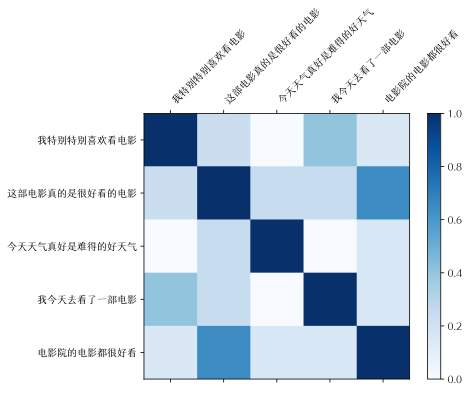

In [13]:
# 导入 matplotlib 库，用于可视化余弦相似度矩阵
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.rcParams["font.family"] = ['HYYiSongW']  # 用来设定字体样式
plt.rcParams['font.sans-serif'] = ['HYYiSongW']  # 用来设定无衬线字体样式
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
fig, ax = plt.subplots()  # 创建一个绘图对象
# 使用 matshow 函数绘制余弦相似度矩阵，颜色使用蓝色调
cax = ax.matshow(similarity_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)  # 条形图颜色映射
ax.set_xticks(range(len(corpus)))  # x 轴刻度
ax.set_yticks(range(len(corpus)))  # y 轴刻度
ax.set_xticklabels(corpus, rotation=45, ha='left')  # 刻度标签
ax.set_yticklabels(corpus)  # 刻度标签为原始句子
plt.show()  # 显示图形